In [17]:
from IPython.display import HTML

html = """
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Cinzel:wght@400;600;700&family=Crimson+Text:ital,wght@0,400;0,600;1,400;1,600&display=swap');
</style>
</head>

<div style="
    font-family: 'Crimson Text', serif !important; 
    color: #e8d5a0 !important;
    background: linear-gradient(135deg, rgba(26, 26, 46, 0.4), rgba(15, 52, 96, 0.3)) !important;
    border: 2px solid #d4af37 !important;
    border-radius: 12px !important;
    padding: 25px !important;
    margin: 15px 0 !important;
    box-shadow: 0 0 20px rgba(212, 175, 55, 0.3) !important;
    text-align: center !important;
">

<h2 style="
    font-family: 'Cinzel', serif !important;
    background: linear-gradient(45deg, #d4af37, #f4e968, #d4af37) !important;
    -webkit-background-clip: text !important;
    -webkit-text-fill-color: transparent !important;
    background-clip: text !important;
    font-size: 2.5em !important;
    margin-bottom: 15px !important;
    letter-spacing: 2px !important;
">👑 One Notebook to Rule Them All 💍</h2>

<p style="font-style: italic !important; font-size: 1.3em !important; color: #c9b037 !important;">
    <em>"In the halls of digital wisdom, where algorithms dwell and data flows like the waters of Nimrodel,
    <br>
    we embark upon a quest most noble. Here shall be envisaged the tales and tongues of Middle-earth, 
    as elated by the great loremaster Tolkien, whose words have echoed along the ages.
    <br>
    With the arts of Natural Language Processing, we shall delve deep into the linguistic treasures of The Lord of the Rings, 
    <br>
    seeking patterns hidden within the ancient texts, as a dwarf seeks mithril in the depths of Khazad-dûm.
    <br><br>
    ~ From the archives of ashishsinhaiitr, keeper of the Kaggle datasets ~ "</em>
</p>

</div>

<style>
/* Bring back the magic, but avoid layout-breaking properties */
* {
    font-family: 'Crimson Text', serif !important;
    font-size: 1.01em !important;
    color: #e8d5a0 !important;
    line-height: 1.7 !important;
}

/* Background styling but NO padding/margin changes that break layout */
div, p {
    background: linear-gradient(135deg, rgba(26, 26, 46, 0.1), rgba(15, 52, 96, 0.05)) !important;
    border-radius: 5px !important;
    /* REMOVED: padding and margin that broke positioning */
}

pre, code {
    background: rgba(0, 0, 0, 0.3) !important;
    border: 1px solid rgba(212, 175, 55, 0.3) !important;
    border-radius: 8px !important;
    padding: 10px !important;
    color: #d4af37 !important;
    font-style: italic !important;
}

/* Preserve critical layout properties */
.jp-Cell,
.jp-MarkdownCell,
.jp-CodeCell {
    position: relative !important;
}
</style>
</html>
"""

HTML(html)

# Outlook of the notebook: 

1. Data
2. Analytics on the dataset (format, scructure, chapters' divider, prologue?)
3. Analysis of one book to test the strategies
4. Analysis of the trilogy
5. Dialogs & population selection
6. Sentiment analysis around specific character groups: elves, orcs (text segmentation & analysis)
       - Challenges: fewer data, author pespective more than population perspective (bias)
       - insights: how does the sentiment change with the different population?
       - any specific pattern in a population?
       - Tolkeen approach on the different population. 

<div style="text-align: center; margin: 20px 0;">
    <h1 style="
        font-family: 'Cinzel', serif; 
        font-size: 2.5em; 
        font-weight: 700; 
        background: linear-gradient(45deg, #d4af37, #f4e968, #d4af37); 
        -webkit-background-clip: text; 
        -webkit-text-fill-color: transparent; 
        background-clip: text; 
        text-shadow: 0 0 20px rgba(212, 175, 55, 0.5); 
        letter-spacing: 2px;
        margin: 0;
    ">Data</h1>
</div>

In [18]:
import kagglehub
from pathlib import Path
from pprint import pprint

import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer




pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 100)  

# For other libraries
import sys
import io

# Increase recursion limit if needed
sys.setrecursionlimit(10000)

import utils as u


In [19]:
root=Path(kagglehub.dataset_download("ashishsinhaiitr/lord-of-the-rings-text"))
print(root)

C:\Users\laran\.cache\kagglehub\datasets\ashishsinhaiitr\lord-of-the-rings-text\versions\1


In [20]:
files=sorted(p for p in root.rglob("*") if p.is_file())
pprint(files[:10])

[WindowsPath('C:/Users/laran/.cache/kagglehub/datasets/ashishsinhaiitr/lord-of-the-rings-text/versions/1/01 - The Fellowship Of The Ring.txt'),
 WindowsPath('C:/Users/laran/.cache/kagglehub/datasets/ashishsinhaiitr/lord-of-the-rings-text/versions/1/02 - The Two Towers.txt'),
 WindowsPath('C:/Users/laran/.cache/kagglehub/datasets/ashishsinhaiitr/lord-of-the-rings-text/versions/1/03 - The Return Of The King.txt')]


In [21]:
fellowship_file=files[0]

encodings_to_try = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']

for encoding in encodings_to_try:
    try:
        with open(fellowship_file, 'r', encoding=encoding) as f:
            text =f.read()
        print(f"Successufully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed with encoding: {encoding}")
        continue
else:
    print('none of th eencoding worked')



print(f"File: {fellowship_file.name}")
print(f"Character count: {len(text):,}")
print(f"Word count (approx): {len(text.split()):,}")

lines=text.split('\n')
print(f"Total lines: {len(lines)}")

failed with encoding: utf-8
Successufully read with encoding: latin-1
File: 01 - The Fellowship Of The Ring.txt
Character count: 1,021,113
Word count (approx): 187,838
Total lines: 4270


<div style="text-align: center; margin: 20px 0;">
    <h1 style="
        font-family: 'Cinzel', serif; 
        font-size: 2.5em; 
        font-weight: 700; 
        background: linear-gradient(45deg, #d4af37, #f4e968, #d4af37); 
        -webkit-background-clip: text; 
        -webkit-text-fill-color: transparent; 
        background-clip: text; 
        text-shadow: 0 0 20px rgba(212, 175, 55, 0.5); 
        letter-spacing: 2px;
        margin: 0;
    ">Book 1: The fellowship of the ring</h1>
</div>


In [22]:
cleaned_text=re.sub(f'\s+', ' ', text.strip())
words=cleaned_text.lower().split()
clean_words=[re.sub(r'[^\w]', '', word) for word in words if re.sub(r'[^\w]', '', word)]

In [23]:
word_freq=Counter(clean_words)
print(f"Unique words: {len(word_freq)}")
print(f"Most common words: {word_freq.most_common(10)}")

Unique words: 9808
Most common words: [('the', 11703), ('and', 7548), ('of', 5081), ('to', 3946), ('a', 3717), ('he', 2985), ('in', 2957), ('it', 2712), ('i', 2691), ('that', 2491)]


In [24]:
print('Character analysis:')
print("-"*20)
characters=[ 'frodo', 'bilbo', 'sam', 'gandalf', 'aragorn', 'legolas', 'gimli', 'boromir', 'merry', 'pippin']
character_mention={char:word_freq.get(char, 0) for char in characters}
print(f"Character mentions: {character_mention}")


Character analysis:
--------------------
Character mentions: {'frodo': 1033, 'bilbo': 265, 'sam': 395, 'gandalf': 446, 'aragorn': 200, 'legolas': 94, 'gimli': 116, 'boromir': 148, 'merry': 219, 'pippin': 208}


# Sentiment trend: TextBlob and Vader
 
**TextBlob** handles complex sentences well and could be potentially of use for the long sentences in the lord of the rings.  
**Vader** was built in for social media and could be a cons in analysing the long sentences of the book, it can handle though more nuanced emotions.



In [25]:
def create_word_chunks(text, chunk_size=500):
    words=text.split()
    chunks=[]

    for i in range(0, len(words), chunk_size):
        chunk= ' '.join(words[i:i + chunk_size])
        chunks.append(chunk)

    return chunks

In [26]:
chunks=create_word_chunks(text, 500)
print(f"created {len(chunks)} chunks of ~500 words")
print("First chunk preview (first 200 characters)")
print("-"*20)
print(f"{chunks[0][:200]} ...")

created 376 chunks of ~500 words
First chunk preview (first 200 characters)
--------------------
Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Nine for Mortal Men doomed to die, One for the Dark Lord on his dark throne In the Land of Mordor wher ...


In [27]:
text_chunk = chunks[0]  # first chunk 

blob=TextBlob(text_chunk)
print("TextBlob results (first chunk):")
print(f"Polarity: {blob.sentiment.polarity:.3f} (-1 = negative, 1=positive)")
print(f"Subjectivity: {blob.sentiment.subjectivity:.3f} (0=objective, 1=subjective)")

TextBlob results (first chunk):
Polarity: 0.171 (-1 = negative, 1=positive)
Subjectivity: 0.438 (0=objective, 1=subjective)


In [28]:
analyzer=SentimentIntensityAnalyzer()
vader_scores = analyzer.polarity_scores(text_chunk)
print("Vader results (first chunk):")
print(f"\nVADER results: {vader_scores}")

Vader results (first chunk):

VADER results: {'neg': 0.063, 'neu': 0.849, 'pos': 0.088, 'compound': 0.9161}


### **Observations:**

Both tools seems to suggest the narrative of the first chunk is fairly neutral to positive.  
By textblob is neutral, by Vader is positive but the neutral component of the words is the most respresented.   
Vader seems to interpret it as more positive than TextBlob.

In [32]:
text_indices=[50, 150, 300]

for i in text_indices:
    print(f"\n--- Chunk {i} ---")
    blob = TextBlob(chunks[i])
    vader_scores=analyzer.polarity_scores(chunks[i])

    print(f"TextBlob: {blob.sentiment.polarity:.3f}")
    print(f"VADER: {vader_scores}")


--- Chunk 50 ---
TextBlob: 0.076
VADER: {'neg': 0.077, 'neu': 0.819, 'pos': 0.104, 'compound': 0.9518}

--- Chunk 150 ---
TextBlob: 0.118
VADER: {'neg': 0.118, 'neu': 0.793, 'pos': 0.088, 'compound': -0.9271}

--- Chunk 300 ---
TextBlob: 0.106
VADER: {'neg': 0.09, 'neu': 0.855, 'pos': 0.055, 'compound': -0.9648}


In [35]:
print('Chunk no.50')
print(f"{chunks[50][:500]}")
print("-"*20)
print('Chunk no.150')
print(f"{chunks[150][:500]}")
print("-"*20)
print('Chunk no.300')
print(f"{chunks[300][:500]}")

Chunk no.50
night up into the highlands, and he found a little cave out of which the dark stream ran; and he wormed his way like a maggot into the heart of the hills, and vanished out of all knowledge. The Ring went into the shadows with him, and even the maker, when his power had begun to grow again, could learn nothing of it.' 'Gollum!' cried Frodo. 'Gollum? Do you mean that this is the very Gollum-creature that Bilbo met? How loathsome!' 'I think it is a sad story,' said the wizard, 'and it might have ha
--------------------
Chunk no.150
Butterbur, picking up the tray and gathering up the broken crockery. 'Of course there's a mistake!' said Frodo. 'I haven't vanished. Here I am! I've just been having a few words with Strider in the comer.' He came forward into the firelight; but most of the company backed away,_,_ even more perturbed than before. They were not in the least satisfied by his explanation that he had crawled away quickly under the tables after he had fallen. Most of the

# Sentiment trend: TextBlob and Vader

In [37]:
s_b = []   # sentiment blob
s_v = []  # sentiment vader
s_v_p=[]  # vader positive component
s_v_b=[]  # vader negative component (b=bad)
s_v_n=[]  # vader neutral component 

for i, c in enumerate(chunks):
    if i % 50 == 0:
        print(f"Processing chunk {i}/{len(chunks)}")

    b = TextBlob(c)
    s_b.append(float(b.sentiment.polarity))

    v_s = analyzer.polarity_scores(c)
    s_v.append(float(v_s["compound"]))
    s_v_p.append(float(v_s["pos"]))
    s_v_b.append(float(v_s["neg"]))
    s_v_n.append(float(v_s["neu"]))


print(f"Blob analysis complete! Range: {min(s_b):.3f} to {max(s_b):.3f}")
print(f"VADER analysis complete! Range: {min(s_v):.3f} to {max(s_v):.3f}")

Processing chunk 0/376
Processing chunk 50/376
Processing chunk 100/376
Processing chunk 150/376
Processing chunk 200/376
Processing chunk 250/376
Processing chunk 300/376
Processing chunk 350/376
Blob analysis complete! Range: -0.143 to 0.293
VADER analysis complete! Range: -0.997 to 0.999


In [38]:
def zscore_list(values):
    n = len(values)
    if n == 0:
        return values[:]
    mean_val = sum(values) / n
    var = sum((v - mean_val) ** 2 for v in values) / (n - 1) if n > 1 else 0.0
    sd = math.sqrt(var)
    if sd == 0.0:
        return [0.0 for _ in values]
    return [(v - mean_val) / sd for v in values]

use_zscore = True  # if True we analyze the shape, if False we analyze the levels 

if use_zscore:
    sentiment_blob_plot = zscore_list(s_b)
    sentiment_vader_plot = zscore_list(s_v)
    y_label = "Sentiment (z-score)"
else:
    sentiment_blob_plot = s_b[:]
    sentiment_vader_plot = s_v[:]
    y_label = "Sentiment score"

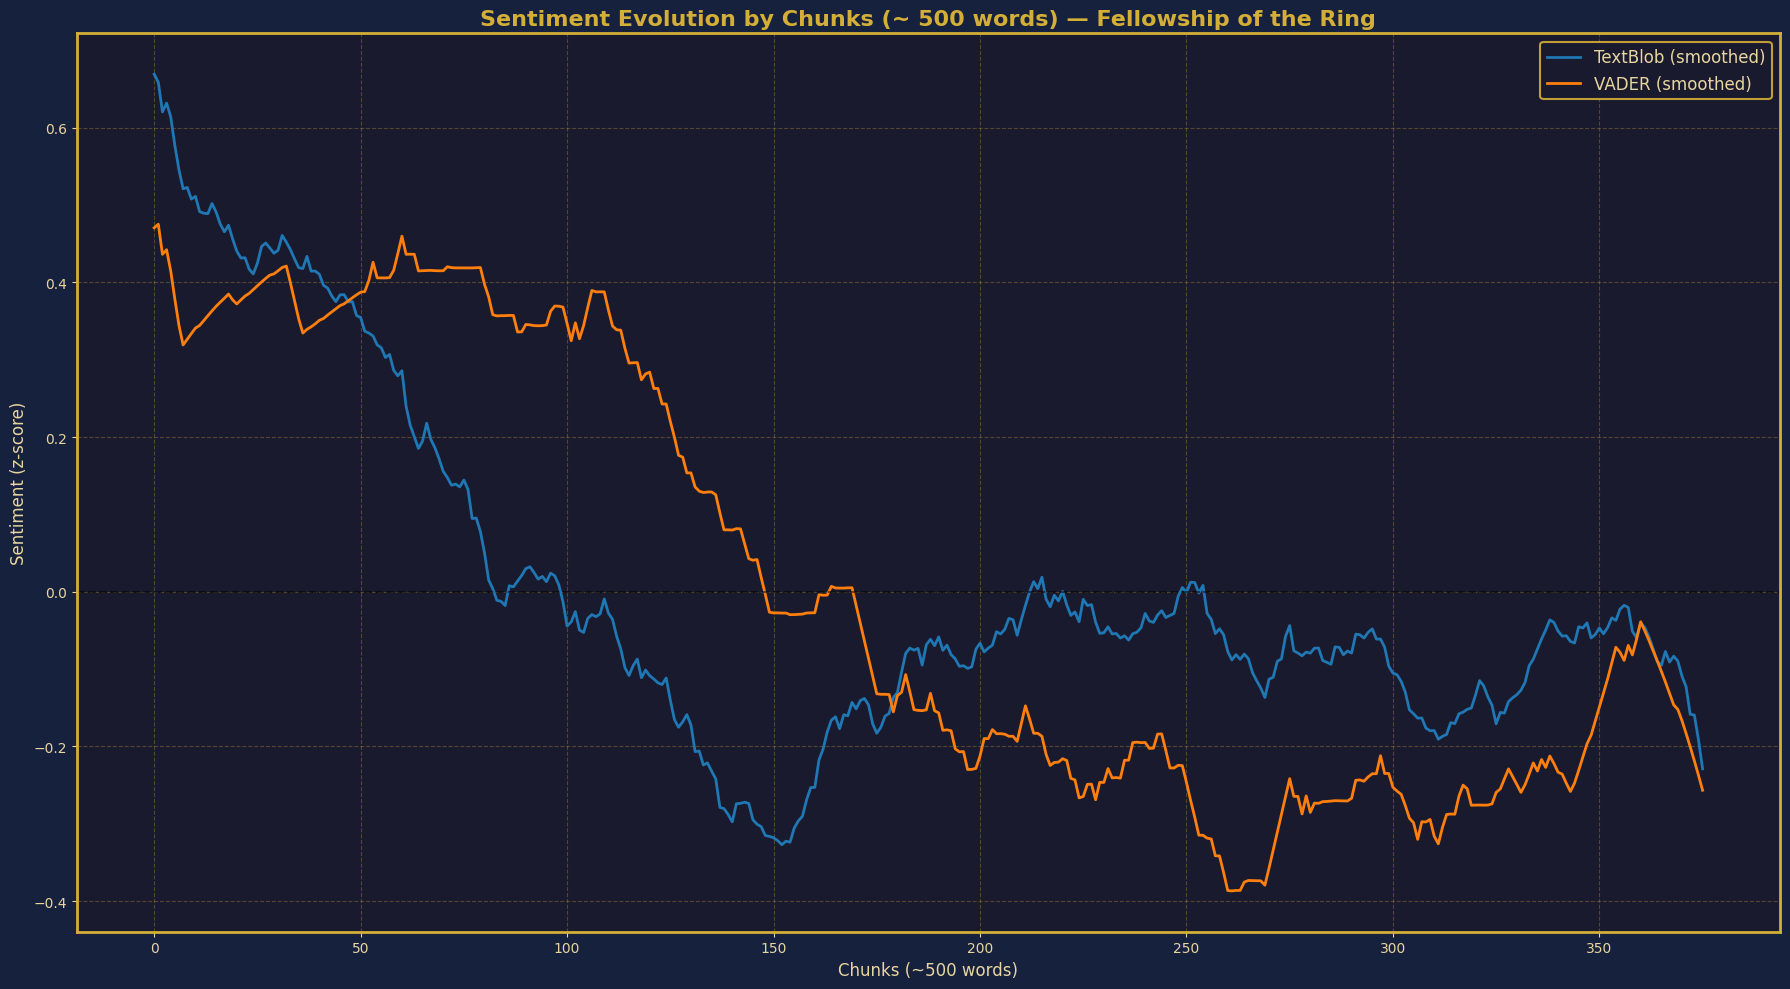

In [ ]:
smooth_window = 100 

x_positions = list(range(len(chunks)))

s_blob = pd.Series(sentiment_blob_plot)
s_vader = pd.Series(sentiment_vader_plot)

s_blob_smooth  = s_blob.rolling(window=smooth_window, center=True, min_periods=1).mean().tolist()
s_vader_smooth = s_vader.rolling(window=smooth_window, center=True, min_periods=1).mean().tolist()

fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(x_positions, s_blob_smooth,  '-', label='TextBlob (smoothed)', linewidth=2)
ax.plot(x_positions, s_vader_smooth, '-', label='VADER (smoothed)',    linewidth=2)

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

ax.set_title('Sentiment Evolution by Chunks (~ 500 words) — Fellowship of the Ring', fontsize=16, fontweight='bold')
ax.set_xlabel('Chunks (~500 words)', fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

u.tolkienize_plot()

plt.tight_layout()
plt.show()

# Sentiment analysis by chapter

In [39]:
def split_into_chapters(text):
    lines = text.split('\n')
    
    chapters = []
    current_chapter = []
    chapter_info = []  
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        
        chapter_match = re.match(r'_Chapter\s+(\d+)_', line)
        
        if chapter_match:
            if current_chapter:
                chapters.append('\n'.join(current_chapter))

            chapter_marker = line
            actual_title = ""

            for j in range(i + 1, min(i + 5, len(lines))):
                if lines[j].strip():
                    actual_title = lines[j].strip()
                    break
            
            chapter_info.append((chapter_marker, actual_title))
            current_chapter = []
        else:
            current_chapter.append(lines[i])
        
        i += 1

    if current_chapter:
        chapters.append('\n'.join(current_chapter))
    
    return chapters, chapter_info


In [40]:
chapters, chapter_info = split_into_chapters(text)

print(f"Found {len(chapters)} chapters:")
print("Prologue" if len(chapters) > len(chapter_info) else "No prologue detected")

for i, (marker, title) in enumerate(chapter_info):
    print(f"{i+1}. {marker} - '{title}'")

Found 23 chapters:
Prologue
1. _Chapter 1_ - 'A Long-expected Party'
2. _Chapter 2_ - 'The Shadow of the Past'
3. _Chapter 3_ - 'Three is Company'
4. _Chapter 4_ - 'A Short Cut to Mushrooms'
5. _Chapter 5_ - 'A Conspiracy Unmasked'
6. _Chapter 6_ - 'The Old Forest'
7. _Chapter 7_ - 'In the House of Tom Bombadil'
8. _Chapter 8_ - 'Fog on the Barrow-Downs'
9. _Chapter 9_ - 'At the Sign of'
10. _Chapter 10_ - 'Strider'
11. _Chapter 11_ - 'A Knife in the Dark'
12. _Chapter 12_ - 'Flight to the Ford'
13. _Chapter 1_ - 'Many Meetings'
14. _Chapter 2_ - 'The Council of Elrond'
15. _Chapter 3_ - 'The Ring Goes South'
16. _Chapter 4_ - 'A Journey in the Dark'
17. _Chapter 5_ - 'The Bridge of Khazad-dûm'
18. _Chapter 6_ - 'Lothlórien'
19. _Chapter 7_ - 'The Mirror of Galadriel'
20. _Chapter 8_ - 'Farewell to Lórien'
21. _Chapter 9_ - 'The Great River'
22. _Chapter 10_ - 'The Breaking of the Fellowship'


In [40]:
#chapters

In [ ]:
s_b = []   # sentiment blob
s_v = []  # sentiment vader
s_v_p=[]  # vader positive component
s_v_b=[]  # vader negative component (b=bad)
s_v_n=[]  # vader neutral component 

for i, c in enumerate(chapters):
    if i % 5 == 0:
        print(f"Processing chapter {i}/{len(chapters)}")

    b = TextBlob(c)
    s_b.append(float(b.sentiment.polarity))

    v_s = analyzer.polarity_scores(c)
    s_v.append(float(v_s["compound"]))
    s_v_p.append(float(v_s["pos"]))
    s_v_b.append(float(v_s["neg"]))
    s_v_n.append(float(v_s["neu"]))


print(f"Blob analysis complete! Range: {min(s_b):.3f} to {max(s_b):.3f}")
print(f"VADER analysis complete! Range: {min(s_v):.3f} to {max(s_v):.3f}")

Processing chapter 0/23
Processing chapter 5/23
Processing chapter 10/23
Processing chapter 15/23
Processing chapter 20/23
Blob analysis complete! Range: 0.010 to 0.131
VADER analysis complete! Range: -1.000 to 1.000


In [49]:
use_zscore = True  # if True we analyze the shape, if False we analyze the levels 

if use_zscore:
    sentiment_blob_plot = zscore_list(s_b)
    sentiment_vader_plot = zscore_list(s_v)
    y_label = "Sentiment (z-score)"
else:
    sentiment_blob_plot = s_b[:]
    sentiment_vader_plot = s_v[:]
    y_label = "Sentiment score"

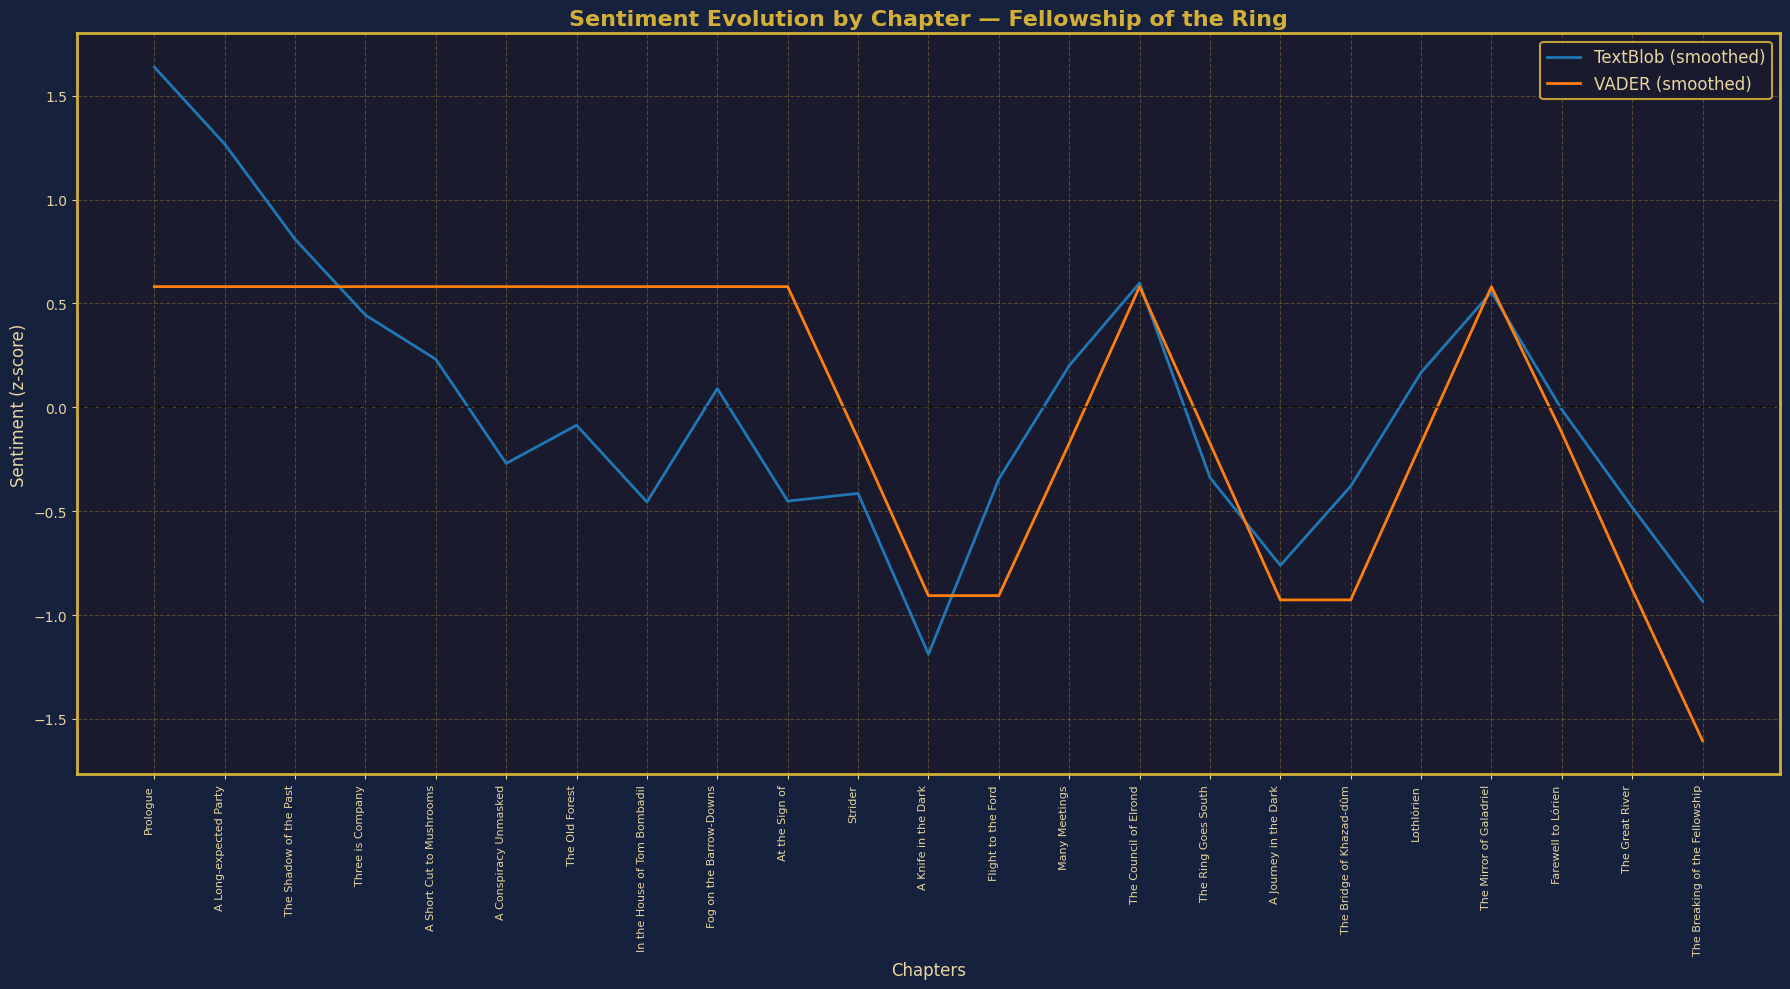

In [50]:
smooth_window= 3

chapter_names = ["Prologue"] + [info[1] for info in chapter_info]

x_positions = list(range(len(chapters)))


s_blob = pd.Series(sentiment_blob_plot)
s_vader = pd.Series(sentiment_vader_plot)

s_blob_smooth  = s_blob.rolling(window=smooth_window, center=True, min_periods=1).mean().tolist()
s_vader_smooth = s_vader.rolling(window=smooth_window, center=True, min_periods=1).mean().tolist()

fig, ax = plt.subplots(figsize=(18, 10))

ax.plot(x_positions, s_blob_smooth,  '-', label='TextBlob (smoothed)', linewidth=2)
ax.plot(x_positions, s_vader_smooth, '-', label='VADER (smoothed)',    linewidth=2)

ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

ax.set_title('Sentiment Evolution by Chapter — Fellowship of the Ring', fontsize=16, fontweight='bold')
ax.set_xlabel('Chapters', fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_xticks(x_positions)
ax.set_xticklabels(chapter_names, rotation=90, ha='right', fontsize=8)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

u.tolkienize_plot()
plt.tight_layout()
plt.show()


Up to now we observed th eemotions in terms of polarity, what if we analyse the book in terms of human emotions?   

In order to do it we can apply different tools: NRCLex and a transformer method, RoBERTa

# Analysis in terms of human emotions

In [51]:
from nrclex import NRCLex
import seaborn as sns
from transformers import pipeline
import textwrap

In [45]:
from IPython.display import HTML

HTML("""
<style>
@import url('https://fonts.googleapis.com/css2?family=Cinzel:wght@400;600;700&family=Crimson+Text:ital,wght@0,400;1,400&display=swap');

.content-scroll {
    max-width: 700px;
    margin: 0 auto;
    font-family: 'Crimson Text', serif;
    font-size: 18px;
    line-height: 1.7;
    background: rgba(0, 0, 0, 0.3);
    border: 1px solid rgba(212, 175, 55, 0.3);
    border-radius: 10px;
    padding: 30px;
    backdrop-filter: blur(5px);
    color: #d4af37;
}

.scroll-text {
    color: #e8d5a0;
    margin-bottom: 20px;
    text-align: justify;
}

.nrclex-reference {
    color: #b8860b;
    font-size: 0.9em;
    font-style: italic;
    margin-top: 20px;
    border-top: 1px solid rgba(212, 175, 55, 0.2);
    padding-top: 15px;
}
</style>

<div class="content-scroll">
    <p class="scroll-text">
        And so let it be set down in the chronicles, that there is spoken here of the sacred writings from the NRCLex archives of the online realm...
        <br><br>
        "NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research 
        Council Canada (NRC) affect lexicon (see link below) and the NLTK library's WordNet synonym sets."
    </p>
    
    <div class="nrclex-reference">
        <em>~ From the chronicles of the NRC Affect Lexicon and the archives of NLTK ~</em>
    </div>
</div>
""")

In [52]:
sample_text=chapters[0]
emotion=NRCLex(sample_text)

print('Emotions detected:')
print(f"Joy: {emotion.affect_frequencies['joy']:.3f}")
print(f"Fear: {emotion.affect_frequencies['fear']:.3f}")
print(f"Anger: {emotion.affect_frequencies['anger']:.3f}")
print(f"Sadness: {emotion.affect_frequencies['sadness']:.3f}")
print(f"Trust: {emotion.affect_frequencies['trust']:.3f}")
print(f"Disgust: {emotion.affect_frequencies['disgust']:.3f}")
print(f"Anticipation: {emotion.affect_frequencies['anticipation']:.3f}")
print(f"Surprise: {emotion.affect_frequencies['surprise']:.3f}")

Emotions detected:
Joy: 0.083
Fear: 0.083
Anger: 0.059
Sadness: 0.083
Trust: 0.128
Disgust: 0.035
Anticipation: 0.117
Surprise: 0.050


In [55]:
EMOTIONS = ['joy','fear','anger','sadness','trust','disgust','anticipation','surprise']

def analyze_chunk(text):
    nrc=NRCLex(text)
    freqs=nrc.affect_frequencies

    result = {}
    for e in EMOTIONS:
        value=freqs.get(e, 0.0)
        result[e] = float(value)
    
    return result

def zscore(s: pd.Series) -> pd.Series:
    mu, sd = s.mean(), s.std(ddof=1)
    return (s - mu) / sd if sd > 0 else pd.Series(np.zeros(len(s)), index=s.index)

In [57]:
s_nrc = {}
for i, c in enumerate(chunks): 
    if i % 50 == 0:
        print(f"Processing chunk {i}/{len(chunks)}")
    nrc=NRCLex(c)
    f=nrc.affect_frequencies
    r = {}
    for e in EMOTIONS:
        v=f.get(e, 0.0)
        r[e]=float(v)
    
    s_nrc[i]=r

print("NRClex analysis complete! Range")

Processing chunk 0/376
Processing chunk 50/376
Processing chunk 100/376
Processing chunk 150/376
Processing chunk 200/376
Processing chunk 250/376
Processing chunk 300/376
Processing chunk 350/376
NRClex analysis complete! Range


In [59]:
use_zscore=True

emotion_series = {e: [s_nrc[i][e] for i in range(len(chunks))] for e in EMOTIONS} # dict of dicts to series (per e)

emotion_z = {e: zscore_list(vals) for e, vals in emotion_series.items()}

s_nrc_z = {
    i: {e: emotion_z[e][i] for e in EMOTIONS}
    for i in range(len(chunks))
}     # rebuilt of the dict

In [ ]:
df = pd.DataFrame(s_nrc_z).unstack()

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375
joy,-0.907355,-0.060365,-1.068523,-0.345279,1.822689,-1.821931,0.034607,-0.996511,-0.034047,0.251684,0.212678,1.638568,-0.911888,0.138212,-0.405261,0.286117,0.627853,-0.372414,2.123978,0.667749,1.066296,1.192947,0.918823,2.075970,2.083898,1.199220,2.194440,1.412796,-0.405261,0.234817,0.443714,0.095660,0.779767,0.291949,0.986923,-0.164381,0.300158,0.704155,-0.119401,0.138212,0.234817,0.138212,0.610077,0.429998,-0.966068,-0.774869,-1.088291,-1.074524,-0.497233,1.602942,0.007896,-1.216781,0.600018,0.059654,-0.357435,-1.018410,-0.111163,-0.755383,0.396823,0.138212,-1.011196,-0.086063,0.604435,1.314962,0.034607,-2.244707,0.002045,1.066296,-1.053248,-0.164381,-0.996511,-0.183081,-0.060365,-1.308560,0.667749,1.451872,1.370756,-0.449357,-0.477599,0.443714,0.974324,0.667749,1.567963,-0.007088,-0.445837,0.839070,0.169566,-1.605387,0.251684,1.455826,-1.196223,1.031807,-0.639884,0.034607,0.803213,0.291949,-0.250308,0.501323,0.074949,-0.147738,0.405956,-0.631654,0.913378,-0.671981,0.264963,0.600018,0.453598,-0.631654,0.291949,-0.271753,-0.436975,1.701202,0.913378,0.563733,1.843420,3.273632,1.991593,0.635744,-0.060365,1.329671,1.370756,0.284531,1.031807,2.648220,1.159463,1.265843,1.744092,0.667749,0.138212,-0.959800,-0.662942,-0.752961,-0.984510,0.610077,1.304849,0.319521,-0.804481,-0.284923,1.610015,-0.013889,1.591211,-0.023342,0.865204,1.265843,-0.497233,0.923790,0.667749,2.409780,1.455826,-0.996511,-0.082884,1.004728,-0.746872,-1.285728,-0.164381,-1.255571,-0.865122,0.402981,-0.326748,-0.317346,-0.767969,-0.808427,-0.755383,-0.542622,-0.732470,0.885097,0.501323,-1.011196,-0.278799,-0.372414,-0.477599,-0.372414,0.303692,0.034607,-0.900496,-1.088291,0.051244,0.376504,0.453598,0.530693,-1.053248,-0.801839,-1.184102,-0.606450,-0.720747,-0.589206,-1.921101,-0.966068,0.573799,-1.356161,0.251684,-0.228391,-0.665664,-0.631654,-0.811232,-0.535222,-1.523273,-0.900496,-0.580446,-0.372414,-0.746872,-0.811232,0.779767,-0.687552,3.094797,1.359458,1.459178,1.147448,0.111438,0.102646,3.141343,1.388655,2.670063,0.722701,1.066296,1.638568,0.034607,0.138212,0.554644,-0.893567,-0.019151,-0.840487,0.116744,-1.668617,-1.167497,-0.457518,0.667749,-0.288580,-0.911888,-0.656094,-0.561361,0.329696,-1.182054,-0.138377,-1.137153,0.182340,0.610077,0.376504,-1.152536,0.116744,-0.196886,-0.147738,-0.656094,-1.285728,0.193629,-0.920863,-0.428026,0.251684,-0.168500,0.048852,0.692857,0.704155,-0.007088,-0.535222,0.632232,0.034607,-1.285728,1.101520,-0.665664,0.429998,0.708770,-1.545718,-0.034047,-1.216781,-0.250308,-0.879493,-0.060365,-0.589206,0.234817,-0.606450,-0.717788,-0.656094,-0.168500,-0.788479,

: 

In [61]:
df = pd.DataFrame(s_nrc_z, index=pd.Index(range(len(chapters)), name="chunk"))

win = 3
df_s = df[[e for e in EMOTIONS]].rolling(window=win, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(14, 6))

for e in EMOTIONS:
    ax.plot(df_s.index, df_s[e + "_z"], label=e.capitalize(), linewidth=1.2)

ax.set_title('Emotion Dynamics in the Fellowship of the Ring (NRCLex, z-scored, centered smoothing)', fontsize=13)
ax.set_xlabel('Chunk')
ax.set_ylabel('Relative intensity (z-score)')

ax.set_xticks(range(0, len(chunks), 1))
ax.set_xticklabels(df.chunk, rotation=90, ha='right', fontsize=8)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

u.tolkienize_plot()
plt.tight_layout()
plt.show()


# chapter_labels = ["Prologue"] + [info[1] for info in chapter_info]

# chapter_labels_wrapped = []
# for label in chapter_labels:
#     if len(label) > 20:
#         wrapped = textwrap.fill(label, width=20)
#         chapter_labels_wrapped.append(wrapped)
#     else:
#         chapter_labels_wrapped.append(label)

# ax.set_xticks(range(0, len(chapters), 1))
# ax.set_xticklabels(chapter_labels_wrapped[::1], rotation=90, ha='right', fontsize=8)
# ax.grid(True, alpha=0.3)
# ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# tolkienize_plot()
# plt.tight_layout()
# plt.show()

KeyError: "None of [Index(['joy', 'fear', 'anger', 'sadness', 'trust', 'disgust', 'anticipation', 'surprise'], dtype='object')] are in the [columns]"

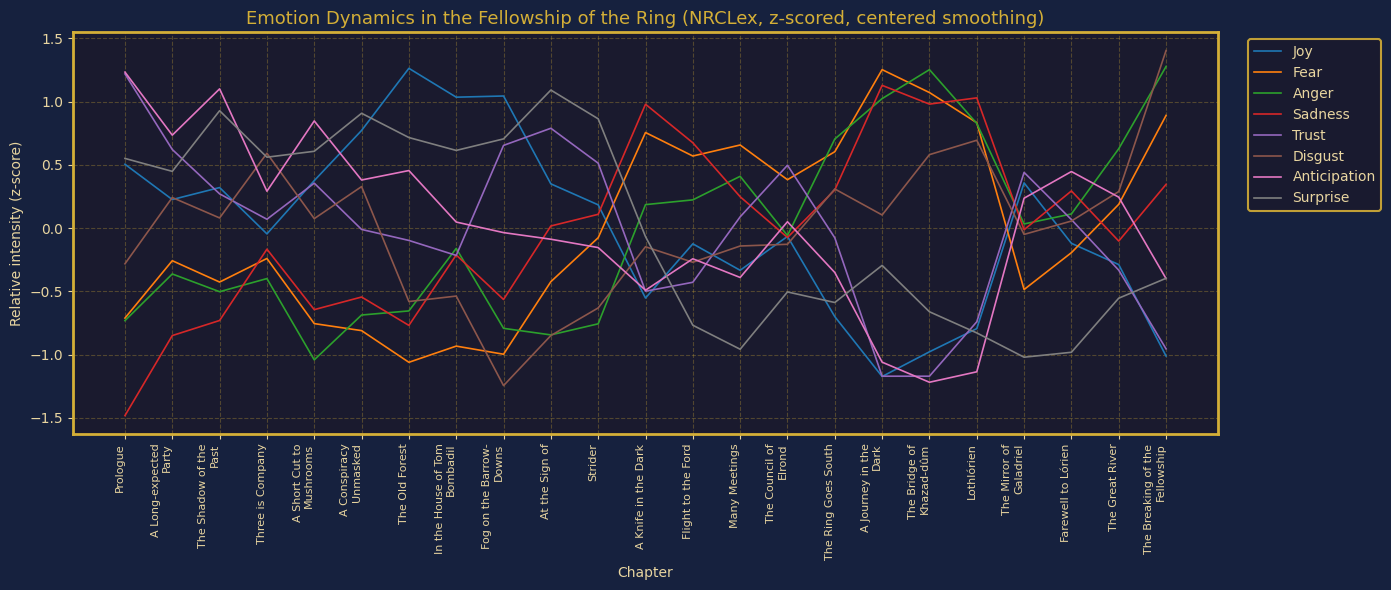

In [49]:
df = pd.DataFrame(emotion_data, index=pd.Index(range(len(chapters)), name="chapter"))

for e in EMOTIONS:
    df[e + "_z"] = zscore(df[e])

win = 3
df_s = df[[e + "_z" for e in EMOTIONS]].rolling(window=win, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(14, 6))

for e in EMOTIONS:
    ax.plot(df_s.index, df_s[e + "_z"], label=e.capitalize(), linewidth=1.2)

ax.set_title('Emotion Dynamics in the Fellowship of the Ring (NRCLex, z-scored, centered smoothing)', fontsize=13)
ax.set_xlabel('Chapter')
ax.set_ylabel('Relative intensity (z-score)')


chapter_labels = ["Prologue"] + [info[1] for info in chapter_info]

chapter_labels_wrapped = []
for label in chapter_labels:
    if len(label) > 20:
        wrapped = textwrap.fill(label, width=20)
        chapter_labels_wrapped.append(wrapped)
    else:
        chapter_labels_wrapped.append(label)

ax.set_xticks(range(0, len(chapters), 1))
ax.set_xticklabels(chapter_labels_wrapped[::1], rotation=90, ha='right', fontsize=8)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

tolkienize_plot()
plt.tight_layout()
plt.show()


In [50]:
def analyze_chunk(text):
    text_lower=text.lower()
    nrc=NRCLex(text_lower)
    freqs=nrc.affect_frequencies

    result = {}
    for e in EMOTIONS:
        value=freqs.get(e, 0.0)
        result[e] = float(value)
    
    return result

def zscore(s: pd.Series) -> pd.Series:
    mu, sd = s.mean(), s.std(ddof=1)
    return (s - mu) / sd if sd > 0 else pd.Series(np.zeros(len(s)), index=s.index)

In [51]:
c_e_data = {e: [] for e in EMOTIONS}

for i, c in enumerate(chunks):
    if i % 50 == 0:
        print(f"Processing chapter {i}/{len(chunks)}")

    metrics = analyze_chunk(c)
    for e in EMOTIONS:
        c_e_data[e].append(metrics[e])

print('All chapters processed')


Processing chapter 0/376
Processing chapter 50/376
Processing chapter 100/376
Processing chapter 150/376
Processing chapter 200/376
Processing chapter 250/376
Processing chapter 300/376
Processing chapter 350/376
All chapters processed


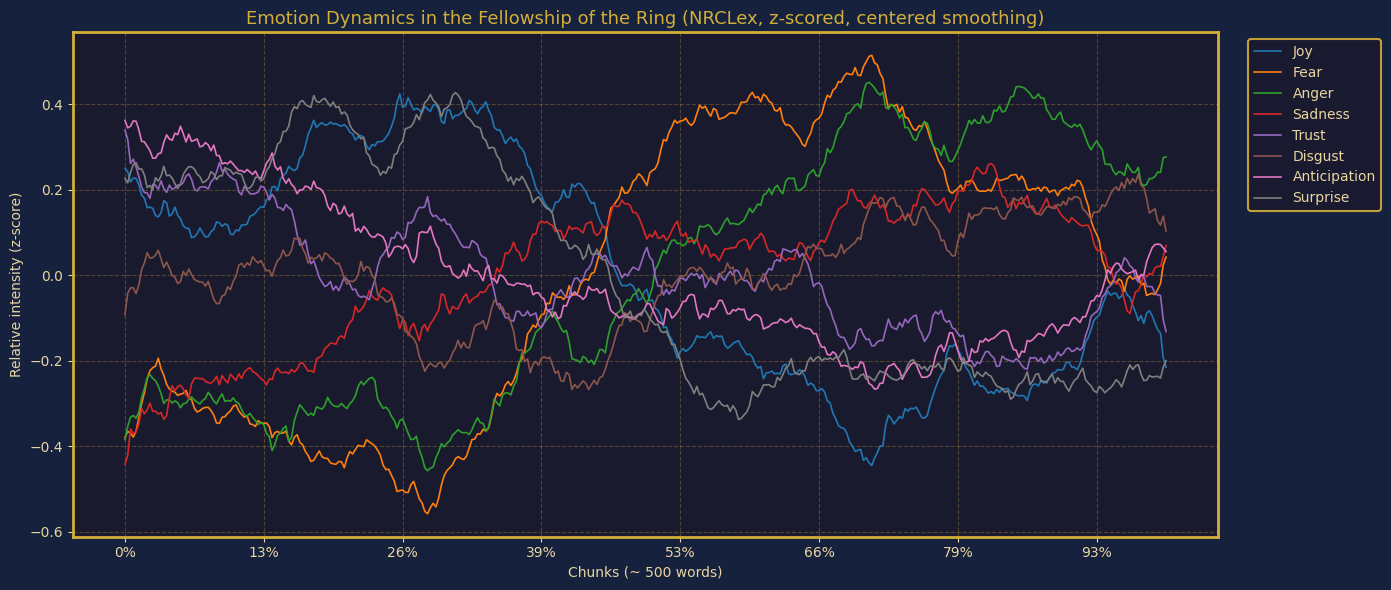

In [52]:
df = pd.DataFrame(c_e_data, index=pd.Index(range(len(chunks)), name="chapter"))

for e in EMOTIONS:
    df[e + "_z"] = zscore(df[e])

win = 100
df_s = df[[e + "_z" for e in EMOTIONS]].rolling(window=win, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(14, 6))

for e in EMOTIONS:
    ax.plot(df_s.index, df_s[e + "_z"], label=e.capitalize(), linewidth=1.2)

ax.set_title('Emotion Dynamics in the Fellowship of the Ring (NRCLex, z-scored, centered smoothing)', fontsize=13)
ax.set_xlabel('Chunks (~ 500 words)')
ax.set_ylabel('Relative intensity (z-score)')


chunk_positions = np.arange(len(chunks)) / len(chunks) * 100
ax.set_xticks(np.arange(0, len(chunks), 50))
ax.set_xticklabels([f"{int(pos)}%" for pos in chunk_positions[::50]])
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
tolkienize_plot()
plt.tight_layout()
plt.show()

# Transformer --> to check with new corrections

In [ ]:
emotion_classifier = pipeline("text-classification", 
                             model="j-hartmann/emotion-english-distilroberta-base")

c:\Users\laran\Home\Documents\code\venv\NLPvenv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\laran\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cuda:0


In [59]:
sample_text = chapters[0][:512]  # First 512 characters (model has input limits)
result = emotion_classifier(sample_text)
print(result)

[{'label': 'sadness', 'score': 0.9179388284683228}]


The transformer model can have a maximum of 512 tokens , we will make smaller chunks

In [62]:
transformer_chunks=create_word_chunks(text, 250)
print(f"created {len(transformer_chunks)} of ~250 words")
print("First chunk preview")
print("-"*20)
print(f"{transformer_chunks[0]}")

created 752 of ~250 words
First chunk preview
--------------------
Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone, Nine for Mortal Men doomed to die, One for the Dark Lord on his dark throne In the Land of Mordor where the Shadows lie. One Ring to rule them all, One Ring to find them, One Ring to bring them all and in the darkness bind them In the Land of Mordor where the Shadows lie. FOREWORD This tale grew in the telling, until it became a history of the Great War of the Ring and included many glimpses of the yet more ancient history that preceded it. It was begun soon after _The Hobbit_ was written and before its publication in 1937; but I did not go on with this sequel, for I wished first to complete and set in order the mythology and legends of the Elder Days, which had then been taking shape for some years. I desired to do this for my own satisfaction, and I had little hope that other people would be interested in this work, espec

In [ ]:
transformers_emotions = []
for i, chunk in enumerate(transformer_chunks):
    if i % 50 == 0:  
        print(f"processing chunk {i} / {len(transformer_chunks)}")
    
    result = emotion_classifier(chunk)
    transformers_emotions.append(result[0])

print("All chunks processed!")

# # Print results
# for i, emotion_result in enumerate(transformers_emotions):
#     chunk_name = f"Chunk {i}"
#     print(f"{chunk_name}: {emotion_result['label']} ({emotion_result['score']:.3f})")

processing chunk 0 / 752
processing chunk 50 / 752
processing chunk 100 / 752
processing chunk 150 / 752
processing chunk 200 / 752
processing chunk 250 / 752
processing chunk 300 / 752
processing chunk 350 / 752
processing chunk 400 / 752
processing chunk 450 / 752
processing chunk 500 / 752
processing chunk 550 / 752
processing chunk 600 / 752
processing chunk 650 / 752
processing chunk 700 / 752
processing chunk 750 / 752
All chunks processed!


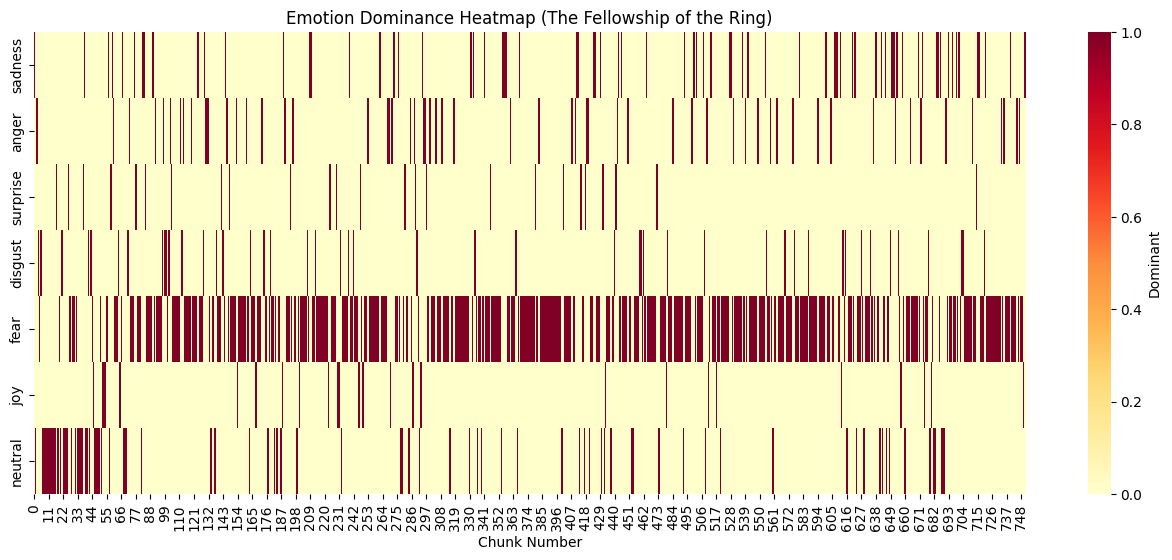

In [77]:
unique_emotions = list(set(emotion_labels))
emotion_matrix = []

for emotion in unique_emotions:
    row = [1 if label == emotion else 0 for label in emotion_labels]
    emotion_matrix.append(row)

plt.figure(figsize=(16, 6))
sns.heatmap(emotion_matrix, yticklabels=unique_emotions, 
            cmap='YlOrRd', cbar_kws={'label': 'Dominant'})
plt.title('Emotion Dominance Heatmap (The Fellowship of the Ring)')
plt.xlabel('Chunk Number')
plt.show()

Chapter boundaries at chunks: [0, 36, 76, 120, 159, 182, 203, 228, 250, 277, 301, 324, 362, 397, 432, 498, 540, 586, 608, 645, 672, 697, 726]


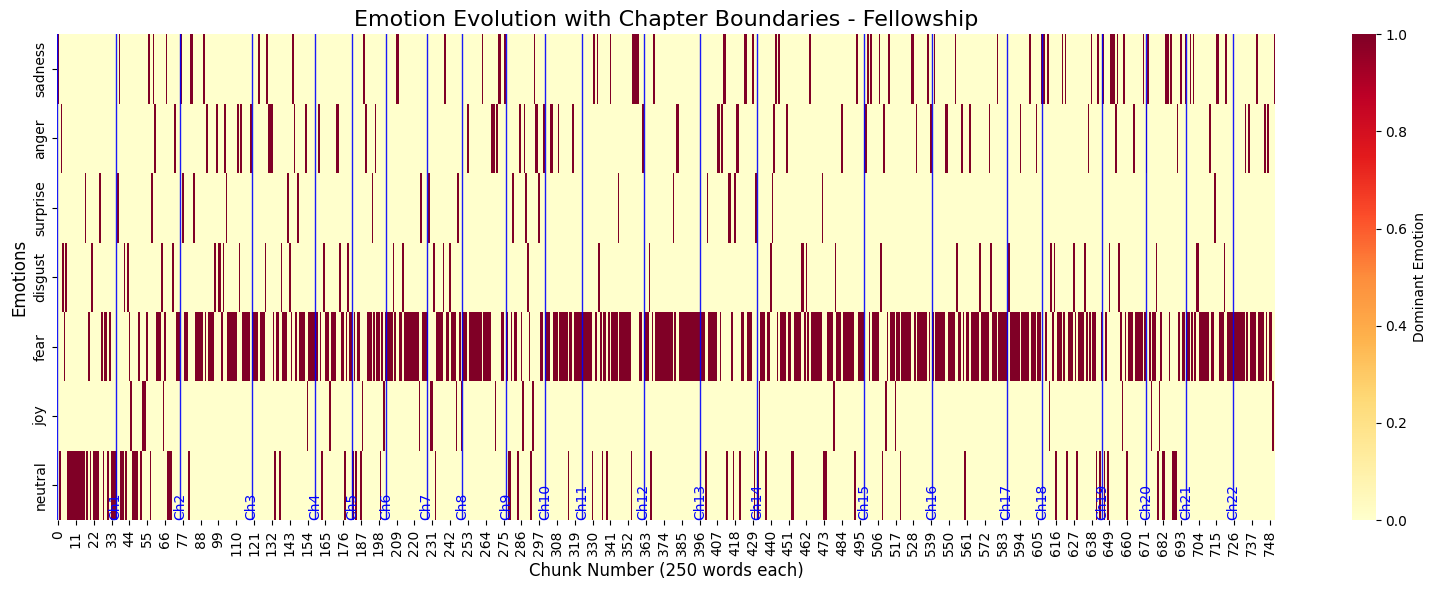

In [ ]:
def calculate_chapter_boundaries(chapters, chunk_size=250):
    boundaries = [0] 
    cumulative_words = 0
    
    for i, chapter in enumerate(chapters[:-1]):  
        chapter_word_count = len(chapter.split())
        cumulative_words += chapter_word_count
        chunk_boundary = cumulative_words // chunk_size
        boundaries.append(chunk_boundary)
    
    return boundaries

chapter_boundaries = calculate_chapter_boundaries(chapters, 250)
print(f"Chapter boundaries at chunks: {chapter_boundaries}")

plt.figure(figsize=(16,6))
sns.heatmap(emotion_matrix, yticklabels=unique_emotions, 
            cmap='YlOrRd', cbar_kws={'label': 'Dominant Emotion'})

for boundary in chapter_boundaries:
    if boundary < len(transformers_emotions): 
        plt.axvline(x=boundary, color='blue', linewidth=1, alpha=0.9)

for i, boundary in enumerate(chapter_boundaries[1:], 1):
    if boundary < len(transformers_emotions):
        plt.text(boundary, len(unique_emotions), f'Ch{i}', 
                rotation=90, fontsize=10, ha='center', va='bottom', color='blue')

plt.title('Emotion Evolution with Chapter Boundaries - Fellowship', fontsize=16)
plt.xlabel('Chunk Number (250 words each)', fontsize=12)
plt.ylabel('Emotions', fontsize=12)
plt.tight_layout()
plt.show()

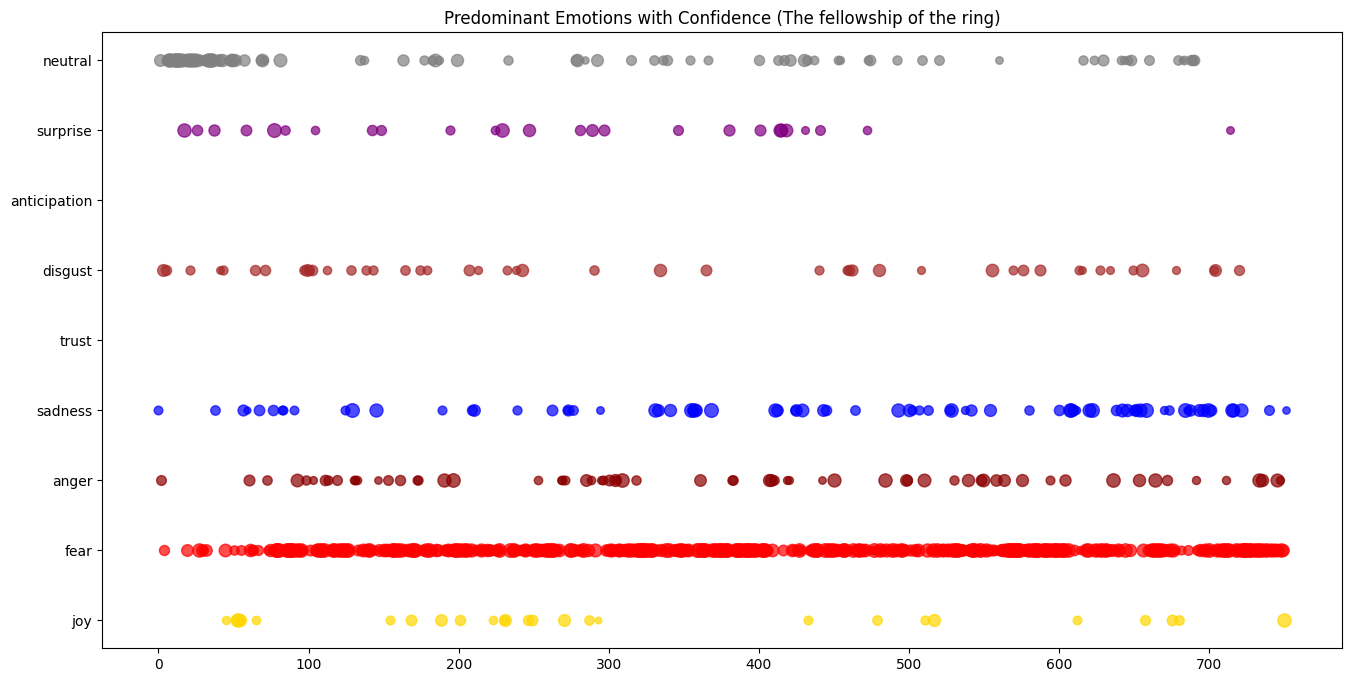

In [91]:
emotion_to_y = {emotion: i for i, emotion in enumerate(emotion_colors.keys())}

fig, ax = plt.subplots(figsize=(16, 8))

for i, emotion_result in enumerate(transformers_emotions):
    emotion = emotion_result['label']
    score = emotion_result['score']
    y_pos = emotion_to_y[emotion]
    
    ax.scatter(i, y_pos, color=emotion_colors[emotion], 
               s=score*100, alpha=0.7)  

ax.set_yticks(range(len(emotion_colors)))
ax.set_yticklabels(emotion_colors.keys())
ax.set_title('Predominant Emotions with Confidence (The fellowship of the ring)')
plt.show()

# --> On the trilogy <--

# Extension to the three books

In [133]:
fellowship_file=files[0]
tower_file=files[1]
king_file=files[2]

book_files=[fellowship_file, tower_file, king_file]

books_data={}
all_texts = []

for i, file in enumerate(book_files):
    with open(file, 'r', encoding='latin-1') as f:
        text=f.read()

    book_name = file.stem
    print(f"Processing {book_name}...")

    books_data[book_name] = {
        'text':text, 
        'file_path': file, 
        'word_count' : len(text.split()),
        'char_count': len(text)
    }

    all_texts.append(text)

    print(f" Words: {len(text.split()):,}")

combined_text='\n\n --- BOOK BREAK ---\n\n'.join(all_texts)

Processing 01 - The Fellowship Of The Ring...
 Words: 187,838
Processing 02 - The Two Towers...
 Words: 154,458
Processing 03 - The Return Of The King...
 Words: 135,290


In [120]:
print(f"Combined statistics:")
print(f"\nTotal character count: {len(combined_text):,}")
print(f"Total word count: {len(combined_text.split()):,}")


Combined statistics:

Total character count: 2,579,992
Total word count: 477,594


In [121]:
cleaned_text=re.sub(r'\s+', ' ', combined_text.strip())
words=cleaned_text.lower().split()

clean_words=[re.sub(r'[^\w]', '', word) for word in words if re.sub(r'[^\w]', '', word)]

In [122]:
word_freq=Counter(clean_words)
print(f"Unique words: {len(word_freq)}")

Unique words: 14957


Sentence Count: 35057
Average Sentence Length: 13.729183900504893 words


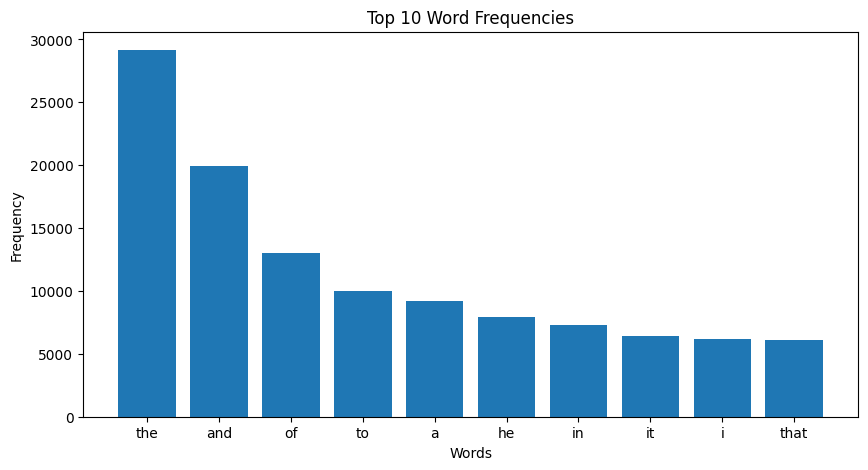

In [123]:
blob = TextBlob(combined_text)
sentences = blob.sentences
sentence_count = len(sentences)
print(f"Sentence Count: {sentence_count}")
sentence_lengths = [len(sentence.words) for sentence in sentences]
average_sentence_length = sum(sentence_lengths) / sentence_count
print(f"Average Sentence Length: {average_sentence_length} words")

# Code to plot the Frequency Distribution
plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_freq.most_common(10)))
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [124]:
print('Character analysis:')
print("-"*20)
characters=[ 'frodo', 'sam', 'gandalf', 'aragorn', 'legolas', 'gimli', 'boromir', 'merry', 'pippin']
character_mention={char:word_freq.get(char, 0) for char in characters}
print(f"Character mentions: {character_mention}")


Character analysis:
--------------------
Character mentions: {'frodo': 1856, 'sam': 1227, 'gandalf': 1078, 'aragorn': 706, 'legolas': 339, 'gimli': 378, 'boromir': 262, 'merry': 575, 'pippin': 658}


In [185]:
all_chapters = []
chapter_labels = []
book_boundaries = []

for book_name in books_data.keys():
    print(f"Processing chapters for: '{book_name}'")
    chapters = books_data[book_name]['chapters'] 
    chapter_info = books_data[book_name]['chapter_info']
    
    book_boundaries.append(len(all_chapters))

    chapter_start_idx = 0  # Prologue
    if len(chapters) > len(chapter_info):
        all_chapters.append(chapters[0])
        chapter_labels.append(f"{book_name[:3]} - Prologue")
        chapter_start_idx = 1
    
    for i, (marker, title) in enumerate(chapter_info):
        all_chapters.append(chapters[chapter_start_idx + i])
        chapter_labels.append(f"{book_name[:3]} - {title}")

print(f"\n--- Final structure: ---")
for book_name in books_data.keys():
    book_data = books_data[book_name]
    print(f"\n'{book_name}':")
    print(f"  Words: {book_data['word_count']:,}")
    print(f"  Chapters: {len(book_data['chapters'])}")

print(f"\nTotal chapters across trilogy: {len(all_chapters)}")

Processing chapters for: '01 - The Fellowship Of The Ring'
Processing chapters for: '02 - The Two Towers'
Processing chapters for: '03 - The Return Of The King'

--- Final structure: ---

'01 - The Fellowship Of The Ring':
  Words: 187,838
  Chapters: 23

'02 - The Two Towers':
  Words: 154,458
  Chapters: 22

'03 - The Return Of The King':
  Words: 135,290
  Chapters: 20

Total chapters across trilogy: 65


## Vader & TextBlob --> to correct as per code above

In [186]:
analyzer=SentimentIntensityAnalyzer()
trilogy_blob = []
trilogy_vader = []

for i, chapter in enumerate(all_chapters):
    if i % 10 == 0:
        print(f"Processing chapter {i} / {len(all_chapters)}")

    blob=TextBlob(chapter)
    trilogy_blob.append(blob.sentiment.polarity)

    vader=analyzer.polarity_scores(chapter)
    trilogy_vader.append(vader['compound'])

Processing chapter 0 / 65
Processing chapter 10 / 65
Processing chapter 20 / 65
Processing chapter 30 / 65
Processing chapter 40 / 65
Processing chapter 50 / 65
Processing chapter 60 / 65


**Below to correct**

In [74]:
# smooth_window = 3
# trilogy_blob_smooth = uniform_filter1d(trilogy_blob, size=smooth_window)
# trilogy_vader_smooth = uniform_filter1d(trilogy_vader, size=smooth_window)

# fig, ax = plt.subplots(figsize=(15, 8))

# ax.plot(range(len(all_chapters)), trilogy_blob_smooth, label='Textblob', linewidth = 1, color='blue')
# ax.plot(range(len(all_chapters)), trilogy_vader_smooth, label='VADER', linewidth=1, color= 'orange')

# for boundary in book_boundaries[1:]:
#     ax.axvline(x=boundary, color = 'green', linestyle = '--', alpha = 0.7, linewidth = 1)

# ax.set_title('Sentiment Evolution Across the trilogy (smoothed)', fontsize = 12)
# ax.set_xlabel('Chapters', fontsize=11)
# ax.set_ylabel('Sentiment score', fontsize = 11)
# ax.legend(fontsize=11)
# ax.grid(True, alpha=0.2)

# chapter_labels_wrapped = []
# for i, label in enumerate(chapter_labels):
#     if len(label) > 25:
#         wrapped = textwrap.fill(label, width=25)
#         chapter_labels_wrapped.append(wrapped)
#     else:
#         chapter_labels_wrapped.append(label)

# ax.set_xticks(range(0, len(all_chapters), 2))
# ax.set_xticklabels(chapter_labels_wrapped[::2], rotation=90, ha='right', fontsize=8)

# plt.subplots_adjust(bottom=0.8)
# plt.tight_layout()
# plt.show()

In [221]:
EMOTIONS = ['joy','fear','anger','sadness','trust','disgust','anticipation','surprise']

# def analyze_chapter(text):
#     text_lower=text.lower()
#     nrc=NRCLex(text_lower)
#     freqs=nrc.affect_frequencies

#     result = {}
#     for e in EMOTIONS:
#         value=freqs.get(e, 0.0)
#         result[emotion] = float(value)
    
#     return result

def analyze_chapter(text: str) -> dict:
    nrc = NRCLex(text.lower())
    return {e: float(nrc.affect_frequencies.get(e, 0.0)) for e in EMOTIONS}

def zscore(s: pd.Series) -> pd.Series:
    mu, sd = s.mean(), s.std(ddof=1)
    return (s - mu) / sd if sd > 0 else pd.Series(np.zeros(len(s)), index=s.index)

In [ ]:
trilogy_emotion_data = {e: [] for e in EMOTIONS}

for i, chapter in enumerate(all_chapters):
    if i % 10 == 0:
        print(f"Processing chapter {i}/{len(all_chapters)}")

    metrics = analyze_chapter(chapter)
    for e in EMOTIONS:
        trilogy_emotion_data[e].append(metrics[e])

# trilogy_emotion_data = [analyze_chapter(ch) for ch in all_chapters]

Processing chapter 0/65
Processing chapter 10/65
Processing chapter 20/65
Processing chapter 30/65
Processing chapter 40/65
Processing chapter 50/65
Processing chapter 60/65


In [ ]:
df = pd.DataFrame(trilogy_emotion_data, index=pd.Index(range(len(all_chapters)), name="chapter"))

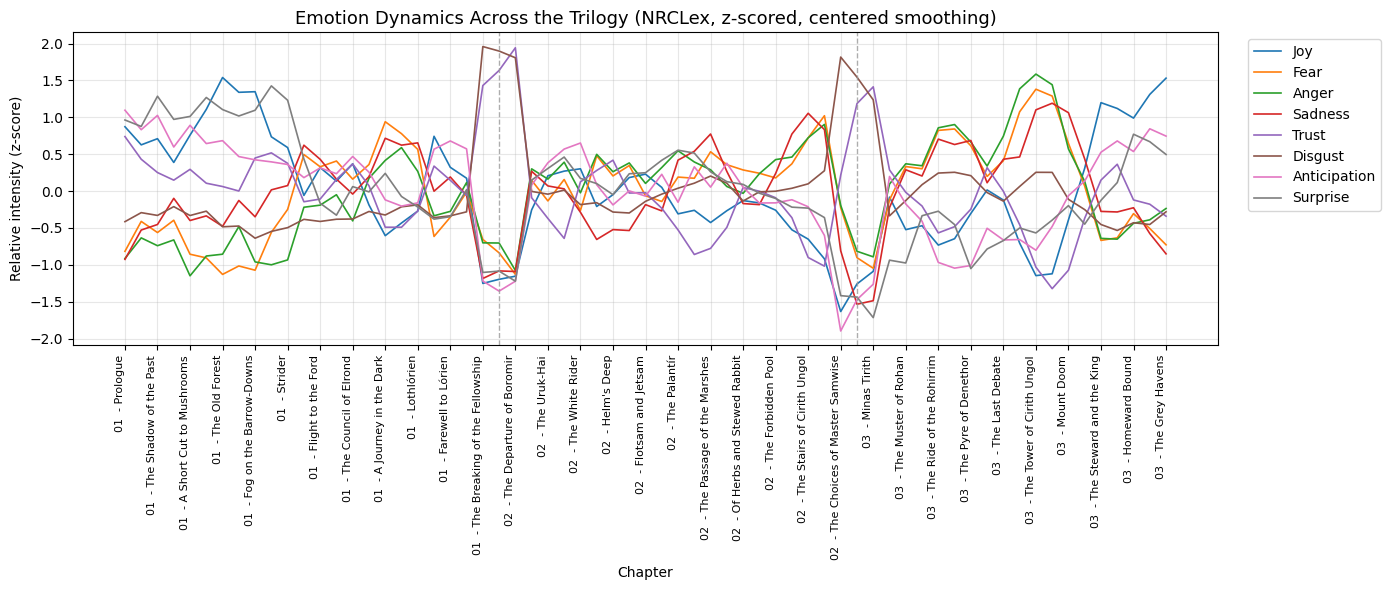

In [224]:
for e in EMOTIONS:
    df[e + "_z"] = zscore(df[e])

win = 3
df_s = df[[e + "_z" for e in EMOTIONS]].rolling(window=win, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(14, 6))

for e in EMOTIONS:
    ax.plot(df_s.index, df_s[e + "_z"], label=e.capitalize(), linewidth=1.2)

for boundary in book_boundaries[1:]:
    ax.axvline(x=boundary, color='0.6', linestyle='--', alpha=0.8, linewidth=1)

ax.set_title('Emotion Dynamics Across the Trilogy (NRCLex, z-scored, centered smoothing)', fontsize=13)
ax.set_xlabel('Chapter')
ax.set_ylabel('Relative intensity (z-score)')
ax.set_xticks(range(0, len(all_chapters), 2))
ax.set_xticklabels(chapter_labels[::2], rotation=90, ha='right', fontsize=8)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
